# Reload MFCC DataFrame

In [1]:
%store -r MFCC_df
MFCC_df

from sklearn.preprocessing import LabelEncoder

#create lable encoder
le = LabelEncoder()
le.fit(MFCC_df.class_label)
le.classes_

,MFCC,class_label
0,"[-267.63034, 44.246216, 7.417145, 41.1478, 8.3...",Atlantic Spotted Dolphin
1,"[-264.33713, 40.970325, 26.28316, 22.650043, 1...",Atlantic Spotted Dolphin
2,"[-270.84164, 45.36312, 30.27132, 25.993517, 9....",Atlantic Spotted Dolphin
3,"[-239.04887, 16.58756, 5.6849847, 60.08927, 1....",Atlantic Spotted Dolphin
4,"[-261.11877, 46.700287, 2.229831, 46.741135, 7...",Atlantic Spotted Dolphin
...,...,...
1613,"[-189.32501, 41.65219, -33.833813, -22.622475,...",White-sided Dolphin
1614,"[-179.45438, 23.963741, -27.340471, -31.353207...",White-sided Dolphin
1615,"[-192.41606, 26.796412, -31.112402, -22.374115...",White-sided Dolphin
1616,"[-196.49988, 36.064262, -35.29801, -25.686985,...",White-sided Dolphin


LabelEncoder()

array(['Atlantic Spotted Dolphin', 'Bearded Seal', 'Bottlenose Dolphin',
       'Bowhead Whale', 'Clymene Dolphin', 'Common Dolphin',
       'False Killer Whale', 'Finback Whale', "Fraser's Dolphin",
       'Harp Seal', 'Humpback Whale', 'Killer Whale',
       'Long-Finned Pilot Whale', 'Melon Headed Whale', 'Narwhal',
       'Northern Right Whale', 'Pantropical Spotted Dolphin',
       "Risso's Dolphin", 'Ross Seal', 'Rough-Toothed Dolphin',
       'Short-Finned (Pacific) Pilot Whale', 'Southern Right Whale',
       'Sperm Whale', 'Spinner Dolphin', 'Striped Dolphin', 'Walrus',
       'White Whale', 'White-beaked Dolphin', 'White-sided Dolphin'],
      dtype=object)

In [2]:
# test StandardScaler

import pandas as pd
#pd.DataFrame(MFCC_df.MFCC[0])
from sklearn.preprocessing import StandardScaler
#MFCC_df.MFCC.to_list()
ss = StandardScaler().fit(MFCC_df.MFCC.to_list())
ss.transform(MFCC_df.MFCC.to_list())

array([[ 0.04222947, -0.05240958,  0.40896568, ..., -0.04927192,
        -0.45479158,  0.43695181],
       [ 0.06778834, -0.09074049,  0.84672224, ...,  0.09927784,
        -0.20974829,  0.42098164],
       [ 0.01730629, -0.03934077,  0.93926132, ...,  0.31068359,
         0.16298675,  0.46140578],
       ...,
       [ 0.62597317, -0.2565882 , -0.4850526 , ...,  0.27442151,
         0.57142228,  1.19160667],
       [ 0.59427836, -0.1481459 , -0.58217317, ...,  1.1880168 ,
         0.55528364,  0.68430603],
       [ 0.54210735, -0.14744035, -0.55582482, ...,  0.70224483,
         0.42087748,  0.7720052 ]])

In [25]:
# test binary classification, only keeps two class
value_counts = MFCC_df.class_label.value_counts()
binary_MFCC_df = MFCC_df[~MFCC_df['class_label'].isin(value_counts[value_counts < 83].index)]
le_binary = LabelEncoder()
le_binary.fit(binary_MFCC_df.class_label)
le_binary.classes_
train_set_binary,test_set_binary=train_test_split(binary_MFCC_df,test_size=0.2,random_state=123)
x_binary_train = np.array(train_set_binary.MFCC.tolist())
y_binary_train = le_binary.transform(np.array(train_set_binary.class_label.tolist()))
x_binary_test = np.array(test_set_binary.MFCC.tolist())
y_binary_test = le_binary.transform(np.array(test_set_binary.class_label.tolist()))

LabelEncoder()

array(["Fraser's Dolphin", 'Spinner Dolphin'], dtype=object)

# Split Data

## Random Split

In [4]:
from sklearn.model_selection import train_test_split

train_set_random,test_set_random=train_test_split(MFCC_df,test_size=0.2,random_state=123)
train_set_random
test_set_random

,MFCC,class_label
824,"[-28.028862, 32.17635, 14.691627, 11.739697, -...",Melon Headed Whale
857,"[-224.48288, 52.32915, 19.997164, 12.00559, 7....",Narwhal
116,"[-131.56389, 131.35234, -11.164649, 38.738487,...",White Whale
928,"[-240.76402, 216.40302, -6.1017833, 36.19306, ...",Northern Right Whale
893,"[-66.87378, 38.03355, -25.403458, 22.998562, -...",Narwhal
...,...,...
1122,"[-269.70218, 44.728638, 4.102123, 5.605767, -0...",Rough-Toothed Dolphin
1346,"[-238.86821, -15.60567, 30.59243, 17.768955, 2...",Spinner Dolphin
1406,"[-260.70355, -126.56804, -103.56169, -14.81516...",Striped Dolphin
1389,"[-229.7787, -126.87282, -111.707016, -16.80273...",Striped Dolphin


,MFCC,class_label
457,"[-161.72356, 7.100871, 19.71363, 5.8479557, -8...",Fraser's Dolphin
748,"[-256.36993, 40.669415, 9.495581, 25.964401, 2...",Long-Finned Pilot Whale
704,"[-133.72849, 82.618614, 9.545635, 13.479022, 1...",Killer Whale
1296,"[-200.42154, 23.584698, 39.514294, 31.551785, ...",Spinner Dolphin
1392,"[-257.7038, -130.40883, -105.55423, -23.504166...",Striped Dolphin
...,...,...
958,"[-281.30194, -51.11833, -60.715134, -29.866772...",Pantropical Spotted Dolphin
72,"[-300.63785, 210.01224, -126.76258, 71.151886,...",Bearded Seal
466,"[-139.0789, 22.625498, 22.757442, 9.805209, -0...",Fraser's Dolphin
1284,"[-203.2916, 35.21191, 33.837044, 34.79334, 6.9...",Spinner Dolphin


In [5]:
x_train_random = np.array(train_set_random.MFCC.tolist())
y_train_random = le.transform(np.array(train_set_random.class_label.tolist()))
x_test_random = np.array(test_set_random.MFCC.tolist())
y_test_random = le.transform(np.array(test_set_random.class_label.tolist()))

## Stratified Split

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=123)
for train_index,test_index in split.split(MFCC_df,MFCC_df["class_label"]):
    train_set_strat = MFCC_df.loc[train_index]
    test_set_strat = MFCC_df.loc[test_index]
train_set_strat
test_set_strat

,MFCC,class_label
1040,"[-130.0061, 103.98132, -36.82569, 22.608412, -...",Ross Seal
1527,"[-127.93521, 73.30445, -16.630316, 2.7073627, ...",White-beaked Dolphin
1188,"[-356.87976, 184.95625, 41.824856, 0.19870812,...",Southern Right Whale
367,"[-324.19498, 22.29798, -30.63091, -28.03511, -...",False Killer Whale
285,"[-154.73775, 113.10654, 14.46577, 29.734438, 2...",Common Dolphin
...,...,...
113,"[-128.81662, 132.48886, 23.790543, 25.622297, ...",White Whale
288,"[-297.27686, 40.499805, 8.552761, 15.098861, 8...",Common Dolphin
927,"[-242.1716, 216.73978, -8.899591, 33.89471, 32...",Northern Right Whale
982,"[-321.8054, -161.16133, -80.946266, 18.084162,...",Pantropical Spotted Dolphin


,MFCC,class_label
293,"[-297.3151, 31.737411, 21.51212, 13.053955, 7....",Common Dolphin
523,"[-138.48187, -16.198004, -63.287643, -41.64153...",Risso's Dolphin
1536,"[-277.97003, -119.871346, -112.51745, -7.14194...",White-beaked Dolphin
1261,"[-300.5002, -168.49664, -90.15861, 41.364605, ...",Sperm Whale
1476,"[-442.89612, 91.01448, -12.184007, 34.8573, 1....",Walrus
...,...,...
555,"[-198.03561, -15.280692, -50.175446, -39.93823...",Risso's Dolphin
350,"[-335.45026, 5.5409975, -22.205381, -14.978383...",False Killer Whale
575,"[-122.55796, 41.157562, 12.771685, 14.512478, ...",Risso's Dolphin
1416,"[-245.22388, -124.01062, -105.85771, -14.56487...",Striped Dolphin


In [7]:
x_train_strat = np.array(train_set_strat.MFCC.tolist())
y_train_strat = le.transform(np.array(train_set_strat.class_label.tolist()))

x_test_strat = np.array(test_set_strat.MFCC.tolist())
y_test_strat = le.transform(np.array(test_set_strat.class_label.tolist()))

# Build Classifier
## KNN Classifier
### KNN 1

Text(0.5, 0, 'K')

Text(0, 0.5, 'Accuracy')

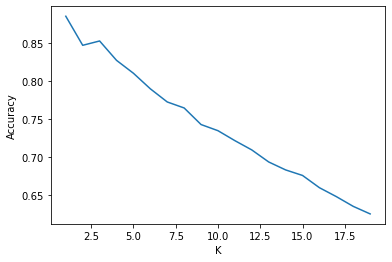

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

k_range = range(1,20)
cv_scores = []
for n in tqdm(k_range):
    knn = KNeighborsClassifier(n)   
    scores = cross_val_score(knn,
                             x_train_strat,
                             y_train_strat,
                             cv=10,
                             scoring='f1_weighted')  
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')

In [9]:
best_knn = KNeighborsClassifier(1)
best_knn.fit(x_train_strat,y_train_strat)
best_knn.score(x_test_strat,y_test_strat)

best_knn_random = KNeighborsClassifier(1)
best_knn_random.fit(x_train_random,y_train_random)
best_knn_random.score(x_test_random,y_test_random)

KNeighborsClassifier(n_neighbors=1)

0.8919753086419753

KNeighborsClassifier(n_neighbors=1)

0.8765432098765432

In [10]:
best_knn = KNeighborsClassifier(1)
best_knn.fit(x_train_strat,y_train_strat)
best_knn.score(x_test_strat,y_test_strat)

KNeighborsClassifier(n_neighbors=1)

0.8919753086419753

In [27]:
RF = RandomForestClassifier()
RF.fit(x_train_strat,y_train_strat)
RF.score(x_test_strat,y_test_strat)

RF = RandomForestClassifier()
RF.fit(x_binary_train,y_binary_train)
RF.score(x_binary_test,y_binary_test)

RandomForestClassifier()

0.8858024691358025

RandomForestClassifier()

0.975609756097561

### Knn Grid CV

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
n_neighbors_list = range(1,20)
metric_list=['euclidean','manhattan','chebyshev','hamming','canberra','braycurtis']
weights_list = ['uniform', 'distance']
parameters={'n_neighbors':n_neighbors_list,'metric':metric_list, 'weights':weights_list}
# create GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=-1, verbose=3,
                   cv=StratifiedKFold(n_splits=10, shuffle=True), scoring='f1_weighted')
#clf.fit(np.array(MFCC_df.MFCC.tolist()),le.transform(np.array(MFCC_df.class_label.tolist())))
#clf.fit(x_train_random,y_train_random)
clf.fit(x_binary,y_binary)

Fitting 10 folds for each of 228 candidates, totalling 2280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2280 out of 2280 | elapsed:    5.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming', 'canberra', 'braycurtis'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted', verbose=3)

In [16]:
# print the table of scores and parameters
result=pd.DataFrame.from_dict(clf.cv_results_)
result=result.loc[:,["param_metric","param_n_neighbors","param_weights","mean_test_score","std_test_score","rank_test_score"]]
result.sort_values("rank_test_score",inplace=True)
result.set_index(["rank_test_score"])[:20]

,param_metric,param_n_neighbors,param_weights,mean_test_score,std_test_score
rank_test_score,,,,,
1,braycurtis,4,distance,0.995038,0.014885
1,braycurtis,4,uniform,0.995038,0.014885
1,braycurtis,2,distance,0.995038,0.014885
1,braycurtis,2,uniform,0.995038,0.014885
1,braycurtis,1,distance,0.995038,0.014885
1,braycurtis,1,uniform,0.995038,0.014885
7,manhattan,3,uniform,0.990077,0.019847
7,manhattan,2,uniform,0.990077,0.019847
7,manhattan,4,distance,0.990077,0.019847


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators':range(50,300,10),
            'criterion':['gini', 'entropy'],
            'min_samples_split':range(1,10)}
#parameters={'n_estimators':range(50,150,10)}
# create GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, verbose=3,
                   cv=StratifiedKFold(n_splits=10, shuffle=True), scoring='f1_weighted')
clf.fit(np.array(MFCC_df.MFCC.tolist()),le.transform(np.array(MFCC_df.class_label.tolist())))
#clf.fit(x_train_random,y_train_random)
#clf.fit(x_binary,y_binary)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   20.0s


KeyboardInterrupt: 

In [29]:
# print the table of scores and parameters
result=pd.DataFrame.from_dict(clf.cv_results_)
#result=result.loc[:,["param_n_estimators","param_criterion","param_min_samples_split","mean_test_score","std_test_score","rank_test_score"]]
result=result.loc[:,["param_n_estimators","mean_test_score","std_test_score","rank_test_score"]]
result.sort_values("rank_test_score",inplace=True)
result.set_index(["rank_test_score"])[:20]

,param_n_estimators,mean_test_score,std_test_score
rank_test_score,,,
1,70,0.885698,0.024194
2,130,0.885465,0.022576
3,110,0.884618,0.024236
4,140,0.884308,0.021893
5,120,0.880880,0.023152
6,80,0.880710,0.018822
7,90,0.878442,0.025389
8,100,0.878125,0.020510
9,50,0.876233,0.022396


## else

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


np.mean(cross_val_score(GaussianNB(),x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))
np.mean(cross_val_score(DecisionTreeClassifier(),x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))
np.mean(cross_val_score(RandomForestClassifier(),x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))

0.6021067311737929

0.6381236717960654

0.8649440676164641

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LogisticRegression_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

np.mean(cross_val_score(LogisticRegression(max_iter=200),x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))
np.mean(cross_val_score(LogisticRegression_pipe,x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))

SVC_pipe = make_pipeline(StandardScaler(), SVC())
np.mean(cross_val_score(SVC(),x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))
np.mean(cross_val_score(SVC_pipe,x_train_strat,y_train_strat,cv=10,scoring='f1_weighted'))


D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

0.7386867807494791

0.7477913425515055

0.4265858650292298

0.782603943533495

In [14]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train_strat,y_train_strat)
svm_clf.predict(x_test_strat)

SVC()

array([17, 10,  4,  8,  8, 10, 25, 19,  6, 26,  9, 21, 25, 13, 25,  7, 22,
        3,  6,  8, 26, 13, 30, 29,  6,  8,  9, 10, 10, 25, 25,  8, 25, 22,
        8, 26, 25, 17, 29, 25,  5,  8,  8,  8, 26, 16, 25,  8, 25, 26, 25,
        8,  8,  5, 26, 21, 19,  7, 25, 19, 25, 21, 25,  6, 25, 26,  8, 25,
        5, 24, 26, 17, 21, 29, 17,  8,  8,  8,  6,  8,  3,  7, 27,  3, 30,
       29, 27,  9, 30, 26, 25, 25, 25, 18,  6, 24, 25,  8,  5, 17, 25, 10,
       26,  8, 25, 19, 17, 26, 26, 25, 10, 26, 21,  9, 13,  8, 29, 21, 20,
        3, 26, 17,  8, 19,  8, 25, 21,  7, 26,  9,  9,  5,  6, 17,  0, 13,
        6,  6, 19, 18,  7, 23, 16,  8,  5, 10, 21, 10,  5,  5, 25, 25,  7,
        9,  6, 19, 22,  8, 20,  4, 20, 18, 19, 25, 17,  6,  3, 10,  8, 27,
       25,  8, 25,  4, 26, 21, 18,  6,  3,  8, 10, 25, 25,  8,  8,  8, 26,
       25, 17,  8, 25, 25,  8, 10,  8, 26, 10,  6, 17,  8, 18, 25, 30, 15,
       26,  9, 25,  3, 25, 10, 26, 17, 10, 15, 22, 21, 10,  8,  8,  8, 19,
       10, 25, 25,  3, 17

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVC_pipe = make_pipeline(StandardScaler(), SVC())

np.mean(cross_val_score(SVC(),
                        x_train_strat,
                        y_train_strat,cv=10,
                        scoring='f1_weighted'))
np.mean(cross_val_score(SVC_pipe,
                        x_train_strat,
                        y_train_strat,cv=10,
                        scoring='f1_weighted'))

0.4265858650292298

0.782603943533495